#  Drzewa Decyzyjne, Las Losowy




Nadszedł czas na rozbudowanie tej wiedzy i zapoznanie się z bardziej zaawansowanymi algorytmami: **drzewami decyzyjnymi**, **lasami losowymi (Random Forest)** . Te modele pozwalają uzyskiwać często lepszą jakość predykcji i większą elastyczność niż proste metody, ale są też bardziej złożone.



Dodatkowo przyjrzymy się technikom poprawiającym proces budowy modelu, takim jak **cross-walidacja**, która daje nam bardziej wiarygodną ocenę jakości modelu, oraz metodom **optymalizacji hiperparametrów** (GridSearchCV, RandomizedSearchCV), które pomagają znaleźć najlepsze ustawienia modelu bez żmudnego, ręcznego eksperymentowania.



Najważniejsze punkty zajęć:

- Zrozumienie, jak działają drzewa decyzyjne w klasyfikacji i regresji.
- Poznanie idei lasów losowych i ensemble learningu (bagging, boosting).
- Optymalizacja hiperparametrów za pomocą GridSearchCV i RandomizedSearchCV.
- Rozszerzenie wiedzy o to, jak te algorytmy działają również w zadaniach regresyjnych, nie tylko klasyfikacyjnych.



Po dzisiejszych zajęciach powinniście umieć świadomie wybierać modele, lepiej oceniać ich jakość, a także dopasowywać parametry, aby uzyskać jak najlepsze wyniki.


## Drzewa Decyzyjne – Idea i Podział Przestrzeni Cech (Klasyfikacja i Regresja)

**Intuicja dla klasyfikacji:**  
Drzewa decyzyjne to algorytmy oparte na logice pytań typu „jeśli - to” (if-then). Wyobraź sobie, że chcesz przewidzieć, czy klient kupi produkt. Zadajesz pytania: „Czy klient ma ponad 30 lat?”, „Czy jego dochód jest większy niż 5000 zł?”, „Czy ma dzieci?”. Na podstawie odpowiedzi kierujesz się w dół drzewa, aż do liścia, który daje finalną przewidywaną klasę (np. "tak, kupi" lub "nie, nie kupi"). Model buduje takie pytania automatycznie, wybierając te, które najlepiej dzielą dane na coraz bardziej jednorodne grupy.




### **Jak działa drzewo decyzyjne?**

1. W korzeniu drzewa umieszczana jest cecha, która najlepiej dzieli zbiór danych na grupy.
2. Na każdym kolejnym poziomie drzewa umieszczana jest kolejna cecha, która najlepiej dzieli zbior danych na podgrupy.
3. W końcowym etapie drzewa, czyli liściach, umieszczane są etykiety lub wartości numeryczne.

Dlatego w praktyce często stosujemy metody ograniczania złożoności (przycinanie drzewa, limit głębokości, minimalna liczba próbek w liściu) lub używamy zespołów drzew (Random Forest).

![placeholder: schemat drzewa decyzyjnego z przykładowymi pytaniami](https://images.datacamp.com/image/upload/v1677504957/decision_tree_for_heart_attack_prevention_2140bd762d.png)

**Drzewa decyzyjne w regresji:**  
W przypadku regresji zamiast przewidywać klasy, drzewo próbuje przewidzieć wartość ciągłą (np. cenę mieszkania). Zamiast mierzyć „czystość klas”, mierzy się zmienność wartości y we węźle (np. za pomocą średniej kwadratowej błędu). Drzewo szuka podziałów cech, które minimalizują rozproszenie wartości docelowej. Na końcu liści w drzewie regresyjnym mamy średnią wartość z próbek należących do danego liścia – to jest przewidywana wartość.

**Zalety:**  
- Łatwa interpretacja: Model można „czytać” jak zestaw reguł decyzyjnych.  
- Brak konieczności skalowania cech: Drzewa dobrze radzą sobie z cechami o różnej skali i rodzaju (kategoryczne, numeryczne).

**Wady:**  
- Podatność na overfitting: Bez regulacji drzewa mogą stać się bardzo głębokie i dopasowane do szumu w danych treningowych.  
- Niestabilność: Niewielka zmiana w danych może znacząco zmienić strukturę drzewa.


## Kryteria Podziału w Drzewach i Miary Błędów (Gini, Entropia, MSE)

W drzewach klasyfikacyjnych dwa najpopularniejsze kryteria podziału to **Gini** i **entropia**:

- **Gini:**  
  Wariancja klas w węźle.  
  Dla klas k:  
  $$ \text{Gini} = 1 - \sum_{k=1}^{C} p_k^2 $$  
  Im niższy Gini, tym węzeł jest bardziej jednorodny. Drzewo stara się wybierać podziały zmniejszające Gini.


- **Entropia:**  
  Pochodzi z teorii informacji.  
  $$ \text{Entropia} = - \sum_{k=1}^{C} p_k \log_2(p_k) $$  
  Przy czystym węźle (wszystkie próbki tej samej klasy) entropia wynosi 0.



Obie miary dążą do uzyskania możliwie „czystych” węzłów. W praktyce różnice między Gini i entropią są niewielkie, jednak Gini jest często domyślny w wielu bibliotekach, ze względu na prostszą implementację.



**W drzewach regresyjnych** kryterium jest inne. Zwykle stosuje się błąd średniokwadratowy (MSE) lub wariancję wartości docelowej. Celem jest taki podział danych, by zmniejszyć rozproszenie wartości y:

$$ \text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \bar{y})^2 $$

Podziały minimalizujące MSE prowadzą do liści, w których wartości docelowe są do siebie zbliżone, a przewidywana wartość (średnia z liścia) jest trafniejsza.






## Overfitting w Drzewach i Techniki Regularyzacji

Drzewa decyzyjne łatwo przeuczają się do danych treningowych, tworząc głębokie i skomplikowane struktury, które perfekcyjnie klasyfikują dane treningowe, ale nie radzą sobie z nowymi danymi.

Jak temu zaradzić?


- **Ograniczanie maksymalnej głębokości:** Dzięki temu drzewo nie tworzy wielu, bardzo szczegółowych rozgałęzień.  
- **Minimalna liczba próbek do podziału w węźle:** Zapobiega tworzeniu węzłów na podstawie bardzo małej liczby przykładów.  
- **Minimalna liczba próbek w liściu:** Liście nie będą reprezentowały pojedynczych outlierów.

Te formy regularyzacji pomagają uzyskać lepszą generalizację. Drzewo staje się mniej wrażliwe na drobne zmiany w danych i przewiduje stabilniej.

W przypadku regresji, overfitting objawia się tym, że drzewo może tworzyć liście zawierające bardzo niewiele próbek, idealnie dopasowując się do szumu. Regularyzacja jest wówczas równie istotna, by zapewnić dobrą predykcję na nieznanych danych.


**Kod ilustracyjny (klasyfikacja):**  
Użyjemy zbioru `iris` z `sklearn.datasets`, który zawiera dane o kwiatach Iris i ich gatunkach.  


Accuracy na treningu: 0.9583333333333334
Accuracy na teście: 1.0
Ważność cech: [0.         0.         0.93462632 0.06537368]


[Text(0.375, 0.875, 'petal length (cm) <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = versicolor'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = setosa'),
 Text(0.3125, 0.75, 'True  '),
 Text(0.5, 0.625, 'petal length (cm) <= 4.75\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = versicolor'),
 Text(0.4375, 0.75, '  False'),
 Text(0.25, 0.375, 'petal width (cm) <= 1.65\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = versicolor'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 36\nvalue = [0, 36, 0]\nclass = versicolor'),
 Text(0.375, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(0.75, 0.375, 'petal width (cm) <= 1.75\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = virginica'),
 Text(0.625, 0.125, 'gini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = versicolor'),
 Text(0.875, 0.125, 'gini = 0.056\nsamples = 35\nvalue = [0, 1, 34]\nclass = virginica')]

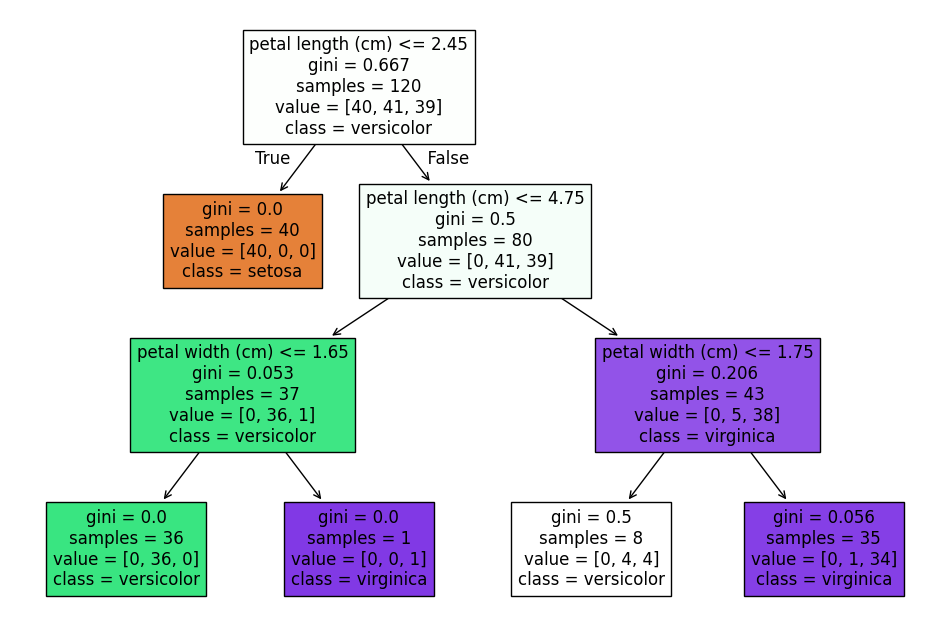

In [9]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()
X, y = iris.data, iris.target

# Podział na trening/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42, criterion='gini', max_depth=3) #paraameters: criterion (gini/entropy), max_dept (int)
clf.fit(X_train, y_train)
# Ewaluacja
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)
print("Accuracy na treningu:", train_acc)
print("Accuracy na teście:", test_acc)

# Feature importances
importances = clf.feature_importances_
print("Ważność cech:", importances)

# # Wizualizacja drzewa
# from sklearn.tree import export_text
# tree_rules = export_text(clf, feature_names=iris.feature_names)
# print("Reguły drzewa decyzyjnego:\n", tree_rules)

# Wizualizacja drzewa w formie graficznej
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

## Ensemble Learning – Bagging vs Boosting i Random Forest

**Ensemble learning** to metoda łączenia wielu modeli (tzw. słabych uczniów) w jeden mocniejszy predyktor. Idea jest taka, że różne modele, patrząc na dane z różnych perspektyw, po uśrednieniu swoich prognoz mogą dać lepszy wynik niż pojedynczy model.

![placeholder: schemat drzewa decyzyjnego z przykładowymi pytaniami](https://prismic-io.s3.amazonaws.com/encord/1e02b8c6-cf23-46af-a6a9-f42678a00289_What+is+ensemble+learning%3F.png)

Dwie główne strategie:

- **Bagging (Bootstrap Aggregating):**  
  Generujemy wiele losowych próbek ze zbioru treningowego (metodą bootstrap – losowanie z zwracaniem). Trenujemy na każdej z tych próbek osobne drzewo decyzyjne. Każde drzewo może znacznie się różnić. Następnie, aby przewidzieć klasę, wykonujemy głosowanie większościowe (w klasyfikacji) lub bierzemy średnią przewidywanych wartości (w regresji). Dzięki temu redukujemy wariancję modelu.
  
- **Boosting:**  
  Modele uczone są sekwencyjnie, a każdy kolejny stara się poprawić błędy poprzednich. To często prowadzi do potężnych predyktorów, ale wymaga ostrożnej regulacji, by uniknąć overfittingu.


![placeholder: schemat drzewa decyzyjnego z przykładowymi pytaniami](https://media.datacamp.com/legacy/v1700592126/image1_fcace6f2b3.png)


**Random Forest** to klasyczny przykład baggingu. Składa się z wielu drzew decyzyjnych, trenowanych na losowych podpróbach danych i z losowym podzbiorem cech dla każdego podziału. Dzięki temu drzewa są od siebie mniej zależne, co zmniejsza wariancję i zwiększa zdolność generalizacji. W regresji Random Forest przewiduje średnią wartości przewidywanych przez każde drzewo, co często daje bardzo stabilne i precyzyjne wyniki.


![placeholder: ](https://miro.medium.com/v2/resize:fit:1010/1*R3oJiyaQwyLUyLZL-scDpw.png)



W praktyce Random Forest jest często punktem odniesienia (baseline) w wielu zadaniach. Jest szybki w trenowaniu, dobrze radzi sobie z różnymi rodzajami cech, zapewnia solidne wyniki i jest mniej podatny na overfitting niż pojedyncze drzewo.

---

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest accuracy test:", rf.score(X_test, y_test))

Random Forest accuracy test: 1.0


In [12]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Importowanie potrzebnych bibliotek
from sklearn.tree import DecisionTreeRegressor                # drzewo decyzyjne do regresji
from sklearn.model_selection import train_test_split          # podział danych na treningowe i testowe

# Zarówno drzewa decyzyjne (DecisionTree) jak i lasy losowe (RandomForest)
# mogą być wykorzystywane zarówno do klasyfikacji, jak i regresji.
# Tutaj przykład użycia drzewa decyzyjnego do regresji.

# Podział danych na treningowe i testowe (80% trening, 20% test)
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Definiowanie modelu drzewa regresyjnego (maksymalna głębokość = 5)
reg = DecisionTreeRegressor(random_state=42, max_depth=4)

# Trenowanie modelu na danych treningowych
reg.fit(X_train_d, y_train_d)

# Ocena modelu za pomocą współczynnika determinacji R²
train_r2 = reg.score(X_train_d, y_train_d)
test_r2 = reg.score(X_test_d, y_test_d)

# Wyświetlenie wyników oceny
print("R² na treningu:", train_r2)
print("R² na teście:", test_r2)


R² na treningu: 0.5845804478210278
R² na teście: 0.3263754171777956


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
X_d, y_d = diabetes.data, diabetes.target

X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.2, random_state=42)

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42,max_depth=4)
rf_reg.fit(X_train_d, y_train_d)
test_r2 = rf_reg.score(X_test_d, y_test_d)


print("Random Forest R² train:", rf_reg.score(X_train_d, y_train_d))
print("R² na teście:", test_r2)



Random Forest R² train: 0.6624809258640015
R² na teście: 0.46457733976829396


## Optymalizacja Hiperparametrów – GridSearchCV i RandomizedSearchCV

**GridSearchCV:**  
Przygotowujemy siatkę (grid) wartości hiperparametrów, które chcemy sprawdzić. Np. dla drzewa: max_depth = [5, 10, 15], min_samples_leaf = [1, 2, 5]. GridSearchCV testuje każdą kombinację używając cross-walidacji i wybiera tę, która daje najlepsze uśrednione wyniki.


**RandomizedSearchCV:**  
Zamiast przeszukiwać wszystkie kombinacje, losowo próbujemy pewną liczbę wariantów z podanego rozkładu wartości hiperparametrów. Jest to bardziej efektywne obliczeniowo, zwłaszcza przy dużych przestrzeniach parametrów.

![](https://ars.els-cdn.com/content/image/1-s2.0-S0169743922000314-gr2.jpg)

Dzięki tym technikom możemy automatycznie dostroić hiperparametry, zamiast ręcznie zgadywać, co poprawi nasz model. Po znalezieniu optymalnych parametrów trenujemy model jeszcze raz na całym zbiorze treningowym i oceniamy go finalnie na zbiorze testowym.

![](https://www.researchgate.net/publication/360189662/figure/fig1/AS:1149088523390989@1650975461937/Hyperparameter-tuning-using-five-fold-cross-validation-GridSearchCV.png)

### 📈 Automatyczna optymalizacja hiperparametrów w Pythonie

Automatyczna optymalizacja hiperparametrów pozwala na znalezienie najlepszych ustawień modelu, minimalizując konieczność ręcznego dostrajania parametrów.

#### 🔍 Popularne biblioteki:

##### 1. [Optuna](https://optuna.org/)
- **Typ optymalizacji:** Bayesowska, oparta o drzewa decyzyjne (TPE), random search.
- **Zalety:** 
  - Łatwa konfiguracja i integracja
  - Możliwość wizualizacji wyników
  - Elastyczna definicja przestrzeni parametrów

##### 2. [Hyperopt](http://hyperopt.github.io/hyperopt/)
- **Typ optymalizacji:** TPE, random search.
- **Zalety:**
  - Bardzo szybkie działanie
  - Prosta składnia
  - Dobra integracja z bibliotekami ML

##### 3. [scikit-optimize (skopt)](https://scikit-optimize.github.io/)
- **Typ optymalizacji:** Bayesowska optymalizacja, Gaussian Processes.
- **Zalety:**
  - Dobre dla niskowymiarowych przestrzeni
  - Integracja ze środowiskiem scikit-learn

## 🧰 Kiedy używać?
- Gdy ręczne dostrajanie parametrów jest czasochłonne lub trudne.
- Gdy zależy nam na osiągnięciu maksymalnej wydajności modelu.



In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris

iris = load_iris()
X, y = iris.data, iris.target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
param_grid = {
    'n_estimators': [40,50,60, 100],
    'max_depth': [None, 5,  40,50, 60],
}


In [42]:

rf = RandomForestClassifier(random_state=42, criterion='gini')
grid_search = GridSearchCV(rf, param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)



Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 40, 50, 60],
                         'n_estimators': [40, 50, 60, 100]},
             verbose=1)

In [45]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=40, random_state=42)

In [46]:

print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepszy wynik CV:", grid_search.best_score_)

Najlepsze parametry: {'max_depth': None, 'n_estimators': 40}
Najlepszy wynik CV: 0.9416666666666667


In [47]:
grid_search.best_estimator_

RandomForestClassifier(n_estimators=40, random_state=42)

In [48]:
# Ewaluacja na teście
best_rf = grid_search.best_estimator_
print("Accuracy test (best RF):", best_rf.score(X_test, y_test))


Accuracy test (best RF): 1.0


In [49]:
import matplotlib.pyplot as plt
import numpy as np
feat_labels = iris.feature_names

importances = grid_search.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

In [35]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

 1) petal length (cm)              0.445788
 2) petal width (cm)               0.414010
 3) sepal length (cm)              0.111594
 4) sepal width (cm)               0.028608


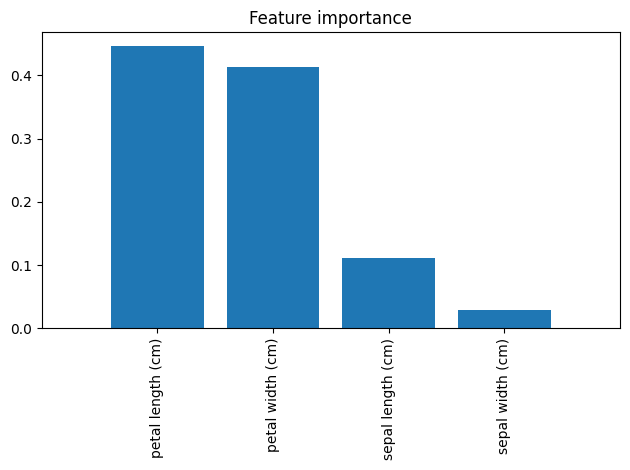

In [36]:
# Plot feature importances
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')
plt.xticks(range(X_train.shape[1]), 
           [feat_labels[i] for i in indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('feature_importance.png', dpi=300)
plt.show()

# Opis zbioru danych "Mushroom"

## **Ogólny opis**
Zbiór danych "Mushroom" zawiera informacje na temat charakterystyk grzybów oraz ich klasyfikacji jako:
- **jadalne** (`e` - edible)
- **trujące** (`p` - poisonous)

Zbiór ten jest często wykorzystywany w zadaniach klasyfikacyjnych, zwłaszcza przy pracy z danymi kategorycznymi. 

## **Podstawowe informacje**
- **Liczba wierszy:** 8124 (każdy wiersz reprezentuje jedną próbkę grzyba).
- **Liczba kolumn:** 23 (1 kolumna celu i 22 cechy opisujące grzyby).
- **Braki danych:** Brak brakujących wartości.

## **Kolumna celu**
- `class`: Klasyfikacja grzyba, gdzie:
  - `e` - jadalny
  - `p` - trujący

## **Cechy opisowe**
Wszystkie cechy są kategoryczne. Opis poszczególnych zmiennych:

### 1. **Charakterystyka kapelusza**
- `cap-shape` – Kształt kapelusza (np. dzwonkowaty, stożkowy).
- `cap-surface` – Powierzchnia kapelusza (np. gładka, łuskowata).
- `cap-color` – Kolor kapelusza (np. brązowy, czerwony, biały).

### 2. **Cechy blaszek**
- `gill-attachment` – Sposób przyczepienia blaszek do trzonu.
- `gill-spacing` – Odstęp między blaszkami (może być traktowany jako zmienna porządkowa).
- `gill-size` – Rozmiar blaszek (szerokie lub wąskie).
- `gill-color` – Kolor blaszek (np. biały, różowy, czarny).

### 3. **Charakterystyka trzonu**
- `stalk-shape` – Kształt trzonu (np. poszerzający się lub zwężający).
- `stalk-root` – Rodzaj korzenia trzonu (niektóre wartości brakujące `?`).
- `stalk-surface-above-ring` i `stalk-surface-below-ring` – Powierzchnia trzonu powyżej i poniżej pierścienia.
- `stalk-color-above-ring` i `stalk-color-below-ring` – Kolor trzonu powyżej i poniżej pierścienia.

### 4. **Dodatkowe cechy**
- `bruises` – Czy grzyb ma siniaki po uszkodzeniu.
- `odor` – Zapach grzyba (np. migdałowy, zgniły, brak zapachu).
- `veil-type` i `veil-color` – Typ i kolor osłony (np. biały, żółty).
- `ring-number` – Liczba pierścieni (`none=0`, `one=1`, `two=2`).
- `ring-type` – Typ pierścienia (np. duży, opadający).
- `spore-print-color` – Kolor zarodników.
- `population` – Wielkość populacji grzyba (np. samotny, liczny).
- `habitat` – Środowisko występowania grzyba (np. las, łąka, trawy).

## **Cechy możliwe do traktowania jako liczbowe**
- `ring-number`: Można zakodować jako `n=0`, `o=1`, `t=2`.
- `population`: Można przypisać wartości porządkowe od `solitary=1` do `abundant=6`.
- `gill-spacing`: Można zakodować jako `close=1`, `crowded=2`, `distant=3`.

## **Przydatność zbioru danych**
Zbiór ten jest idealny do:
- **Analizy eksploracyjnej (EDA):** Badanie wpływu cech na jadalność/truciznę.
- **Modeli klasyfikacyjnych:** np. Drzewa decyzyjne, Random Forest, Gradient Boosting.
- **Treningu modeli z danymi kategorycznymi:** Przydatny do pracy nad encodingiem zmiennych.

## **Sugestie dotyczące przetwarzania**
1. **Kodowanie zmiennych kategorycznych:** One-Hot Encoding dla cech nominalnych, Label/Ordinal Encoding dla cech porządkowych.
2. **Balans klas:** Sprawdzenie, czy dane są zbalansowane (w tym przypadku prawdopodobnie są).
3. **Eksploracja cech:** Wizualizacja kluczowych zmiennych, takich jak `odor` i `population`, pod kątem ich wpływu na `class`.

Jeśli potrzebujesz szczegółowych analiz lub wizualizacji, mogę je przygotować!


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [51]:
# -------------------------------------------------------
# 1. Wczytanie danych
# -------------------------------------------------------
df = pd.read_csv("datasets/mushrooms.csv")


In [52]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [53]:

# Komentarze:
# - Klasa: 'class' - e (edible), p (poisonous)
# - Wszystkie inne cechy są kategoryczne.
# - Nie robimy żadnego ordinal encodingu, wszystkie cechy traktujemy po równo.
# - Zakodujemy klasę: e=0, p=1 

df['class'] = df['class'].map({'e':0,'p':1})

In [54]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,0,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,0,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,1,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,0,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,0,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,0,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,1,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [55]:
# -------------------------------------------------------
# 2. EDA 
# -------------------------------------------------------
print("Informacje o zbiorze:")
print(df.info())
print("\nPierwsze wiersze:")
print(df.head())

Informacje o zbiorze:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   int64 
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  st


Rozkład klasy docelowej:
class
0    4208
1    3916
Name: count, dtype: int64


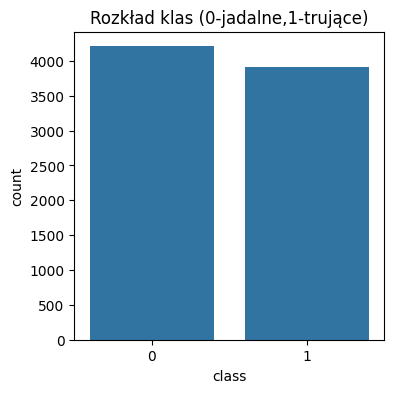

In [56]:
# Rozkład klasy
print("\nRozkład klasy docelowej:")
print(df['class'].value_counts())
plt.figure(figsize=(4,4))
sns.countplot(x='class', data=df)
plt.title("Rozkład klas (0-jadalne,1-trujące)")
plt.show()


In [57]:
# Sprawdzenie zbalansowania klas
class_counts = df['class'].value_counts()
print("Proporcje klas:", class_counts/class_counts.sum())


Proporcje klas: class
0    0.517971
1    0.482029
Name: count, dtype: float64


In [58]:

# Braki danych?
print("\nBraki danych:")
print(df.isnull().sum())


Braki danych:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


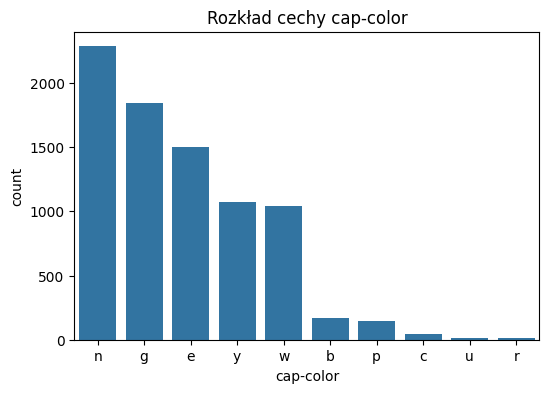

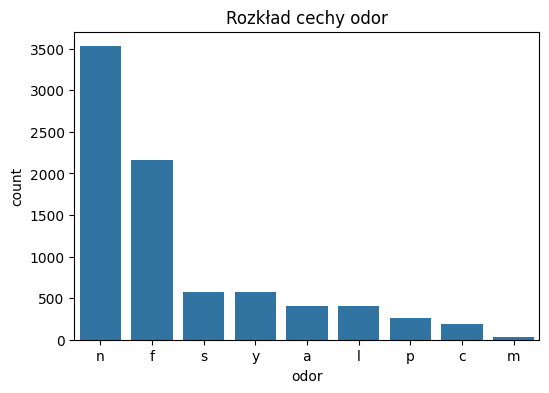

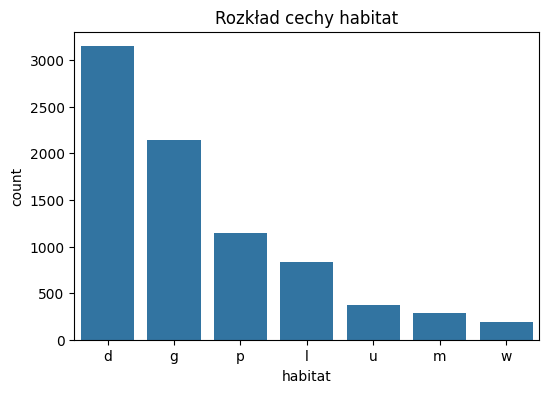

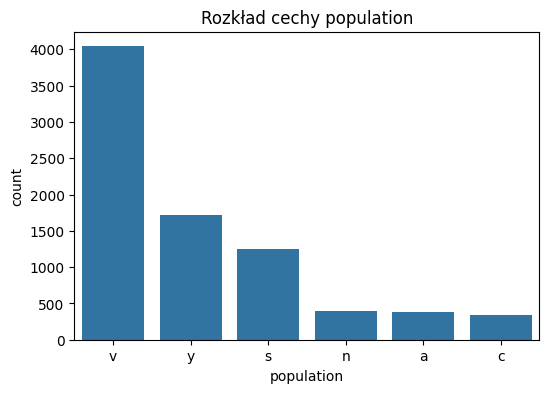

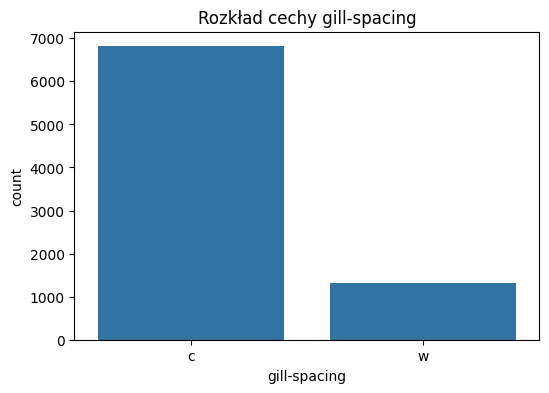

In [59]:
# Wyświetlimy rozkłady kilku przykładowych cech nominalnych
nominal_example_features = ['cap-color', 'odor', 'habitat', 'population', 'gill-spacing']
for feat in nominal_example_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=feat, data=df, order=df[feat].value_counts().index)
    plt.title(f"Rozkład cechy {feat}")
    plt.show()


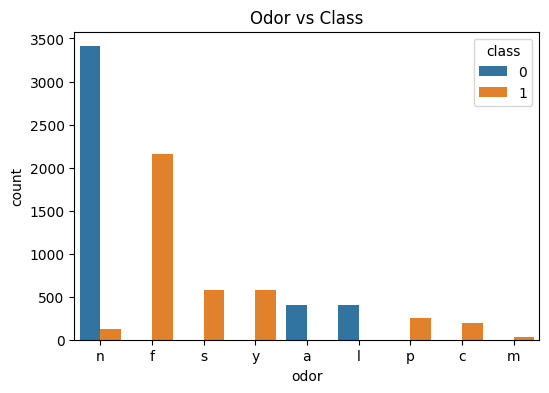

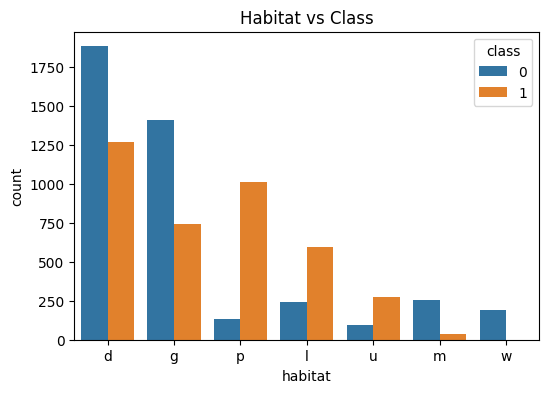

In [60]:
# Relacja cech z klasą - np. odor vs class, habitat vs class
plt.figure(figsize=(6,4))
sns.countplot(x='odor', data=df, hue='class', order=df['odor'].value_counts().index)
plt.title("Odor vs Class")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='habitat', data=df, hue='class', order=df['habitat'].value_counts().index)
plt.title("Habitat vs Class")
plt.show()

In [84]:
# Możemy zobaczyć, czy jakieś cechy wyraźnie różnią się w rozkładzie między klasami.
# Dla kategorycznych cech to widać już powyżej. Odor mocno wpływa na klasę.

# Ponieważ wszystkie cechy są kategoryczne, korelacja Pearson nie ma większego sensu.
# EDA ogranicza się do wizualizacji rozkładów i relacji z klasą.


In [63]:
pd.get_dummies(df,drop_first=True)

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,False,False,False,False,True,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
1,0,False,False,False,False,True,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False
2,0,False,False,False,False,False,False,True,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,False,False,False,True,False
4,0,False,False,False,False,True,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8120,0,False,False,False,False,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
8121,0,False,True,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
8122,1,False,False,True,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False


In [64]:
import uuid
df['id']=uuid.uuid4()

In [65]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
0,1,x,s,n,t,p,f,c,n,k,...,w,w,p,w,o,p,k,s,u,69e18f60-336e-4012-b124-4ad4dd519ef6
1,0,x,s,y,t,a,f,c,b,k,...,w,w,p,w,o,p,n,n,g,69e18f60-336e-4012-b124-4ad4dd519ef6
2,0,b,s,w,t,l,f,c,b,n,...,w,w,p,w,o,p,n,n,m,69e18f60-336e-4012-b124-4ad4dd519ef6
3,1,x,y,w,t,p,f,c,n,n,...,w,w,p,w,o,p,k,s,u,69e18f60-336e-4012-b124-4ad4dd519ef6
4,0,x,s,g,f,n,f,w,b,k,...,w,w,p,w,o,e,n,a,g,69e18f60-336e-4012-b124-4ad4dd519ef6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,k,s,n,f,n,a,c,b,y,...,o,o,p,o,o,p,b,c,l,69e18f60-336e-4012-b124-4ad4dd519ef6
8120,0,x,s,n,f,n,a,c,b,y,...,o,o,p,n,o,p,b,v,l,69e18f60-336e-4012-b124-4ad4dd519ef6
8121,0,f,s,n,f,n,a,c,b,n,...,o,o,p,o,o,p,b,c,l,69e18f60-336e-4012-b124-4ad4dd519ef6
8122,1,k,y,n,f,y,f,c,n,b,...,w,w,p,w,o,e,w,v,l,69e18f60-336e-4012-b124-4ad4dd519ef6


In [66]:
# -------------------------------------------------------
# 3. Preprocessing
# Wszystkie cechy kategoryczne -> OneHotEncoder
# bez żadnego ordinal encoding.
#
# Wyodrębniamy X,y:
target = 'class'
X = df.drop(columns=[target])
y = df[target].values

In [67]:
X

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,69e18f60-336e-4012-b124-4ad4dd519ef6
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,69e18f60-336e-4012-b124-4ad4dd519ef6
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,69e18f60-336e-4012-b124-4ad4dd519ef6
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,69e18f60-336e-4012-b124-4ad4dd519ef6
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,69e18f60-336e-4012-b124-4ad4dd519ef6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,k,s,n,f,n,a,c,b,y,e,...,o,o,p,o,o,p,b,c,l,69e18f60-336e-4012-b124-4ad4dd519ef6
8120,x,s,n,f,n,a,c,b,y,e,...,o,o,p,n,o,p,b,v,l,69e18f60-336e-4012-b124-4ad4dd519ef6
8121,f,s,n,f,n,a,c,b,n,e,...,o,o,p,o,o,p,b,c,l,69e18f60-336e-4012-b124-4ad4dd519ef6
8122,k,y,n,f,y,f,c,n,b,t,...,w,w,p,w,o,e,w,v,l,69e18f60-336e-4012-b124-4ad4dd519ef6


In [70]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat', 'id'],
      dtype='object')

In [ ]:
# Użyjemy ColumnTransformer z OneHotEncoder dla wszystkich kolumn (bo wszystkie są kategoryczne)
all_features = X.columns.tolist()[:-1]
print(all_features)

['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [78]:
# numerical_features = ['kolumna1', 'kolumna2']  # Przykładowe kolumny numeryczne, jeśli są
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", OneHotEncoder(drop='first'), all_features),
        # ("num", StandardScaler(), numerical_features)  # Jeśli są kolumny numeryczne, można je skalować
    ],
    remainder='drop'
)

In [79]:
# preprocessor.fit(X)
# X_transformed = preprocessor.transform(X)
# # Sprawdzenie kształtu przekształconych danych
# print("Kształt przekształconych danych:", X_transformed.shape)
# display(X_transformed.toarray()[:5])  # Wyświetlenie pierwszych 5 wierszy przekształconych danych

In [80]:

# Pipeline bazowy: OneHotEncoder -> StandardScaler
# StandardScaler tutaj jest opcjonalny. Dla completeness zachowajmy go.
# Niektóre modele jak Logistic czy SVM mogą skorzystać.
base_pipeline = Pipeline([
    ("preproc", preprocessor),
    ("scaler", StandardScaler(with_mean=False))
])

In [81]:


# Podział na train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [82]:
# -------------------------------------------------------
# 4. Definicja modeli i siatek hiperparametrów
# -------------------------------------------------------
models_params = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "model__C": [0.1,1,10],
            "model__penalty": ['l2'],
            "model__solver": ['lbfgs']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3,5,7],
            "model__p": [1,2]
        }
    },
    "DecisionTree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {
            "model__max_depth": [None,5,10],
            "model__min_samples_leaf": [1,2,5]
        }
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50,100,200],
            "model__max_depth": [None,5,10],
            "model__min_samples_leaf": [1,2,5]
        }
    },
    "SVM": {
        "model": SVC(random_state=42),
        "params": {
            "model__C": [0.1,1,10],
            "model__gamma": ['scale','auto']
        }
    }
}


In [91]:
models_params['LogisticRegression']

{'model': LogisticRegression(max_iter=1000),
 'params': {'model__C': [0.1, 1, 10],
  'model__penalty': ['l2'],
  'model__solver': ['lbfgs']}}

In [89]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
best_models = {}

In [93]:
# -------------------------------------------------------
# 5. GridSearchCV dla każdego modelu
# -------------------------------------------------------
for name, mp in models_params.items():
    print(f"\nModel: {name}")
    pipe = Pipeline([
        ("preproc_scal", base_pipeline),
        ("model", mp["model"])
    ])
    gs = GridSearchCV(pipe, mp["params"], cv=cv, scoring='accuracy', n_jobs=-1, error_score='raise', verbose=1)
    gs.fit(X_train, y_train)
    print("Najlepsze parametry:", gs.best_params_)
    print("Najlepszy wynik CV:", gs.best_score_)
    best_models[name] = gs.best_estimator_



Model: LogisticRegression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Najlepsze parametry: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Najlepszy wynik CV: 0.9996923076923077

Model: KNN
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Najlepsze parametry: {'model__n_neighbors': 3, 'model__p': 2}
Najlepszy wynik CV: 0.9995384615384616

Model: DecisionTree
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Najlepsze parametry: {'model__max_depth': None, 'model__min_samples_leaf': 1}
Najlepszy wynik CV: 0.9996923076923077

Model: RandomForest
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Najlepsze parametry: {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 50}
Najlepszy wynik CV: 1.0

Model: SVM
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Najlepsze parametry: {'model__C': 1, 'model__gamma': 'scale'}
Najlepszy wynik CV: 0.9995384615384616


In [94]:
# -------------------------------------------------------
# 6. Ocena na zbiorze testowym
# -------------------------------------------------------
print("\nOcena na zbiorze testowym:")
test_scores = {}
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    test_scores[name] = acc
    print(f"{name}: Accuracy test = {acc:.4f}")


Ocena na zbiorze testowym:
LogisticRegression: Accuracy test = 0.9988
KNN: Accuracy test = 0.9988
DecisionTree: Accuracy test = 1.0000
RandomForest: Accuracy test = 1.0000
SVM: Accuracy test = 0.9988


In [113]:
best_model_name

NameError: name 'best_model_name' is not defined

In [95]:
best_model_name = max(test_scores, key=test_scores.get)
print(f"\nNajlepszy model na zbiorze testowym: {best_model_name}")


Najlepszy model na zbiorze testowym: DecisionTree


In [99]:
best_models['RandomForest']['model']

RandomForestClassifier(max_depth=10, n_estimators=50, random_state=42)

In [100]:
X_test

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,id
4632,x,y,g,f,f,f,c,b,p,e,...,p,n,p,w,o,l,h,y,d,69e18f60-336e-4012-b124-4ad4dd519ef6
3444,x,s,w,f,c,f,c,n,u,e,...,w,w,p,w,o,p,n,s,d,69e18f60-336e-4012-b124-4ad4dd519ef6
1209,x,f,w,f,n,f,w,b,p,t,...,w,w,p,w,o,e,n,s,g,69e18f60-336e-4012-b124-4ad4dd519ef6
6880,f,s,e,f,f,f,c,n,b,t,...,w,w,p,w,o,e,w,v,p,69e18f60-336e-4012-b124-4ad4dd519ef6
4542,x,f,y,f,f,f,c,b,g,e,...,p,n,p,w,o,l,h,y,g,69e18f60-336e-4012-b124-4ad4dd519ef6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7554,k,s,n,f,s,f,c,n,b,t,...,p,w,p,w,o,e,w,v,l,69e18f60-336e-4012-b124-4ad4dd519ef6
3198,f,f,g,t,n,f,c,b,w,t,...,w,p,p,w,o,p,n,v,d,69e18f60-336e-4012-b124-4ad4dd519ef6
3850,x,f,e,t,n,f,c,b,n,t,...,w,w,p,w,o,p,n,y,d,69e18f60-336e-4012-b124-4ad4dd519ef6
1965,f,s,n,f,n,f,w,b,p,t,...,w,w,p,w,o,e,k,s,g,69e18f60-336e-4012-b124-4ad4dd519ef6


In [101]:
final_model = best_models['RandomForest']
y_pred_final = final_model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final, target_names=["edible","poisonous"]))



Classification Report:
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       842
   poisonous       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



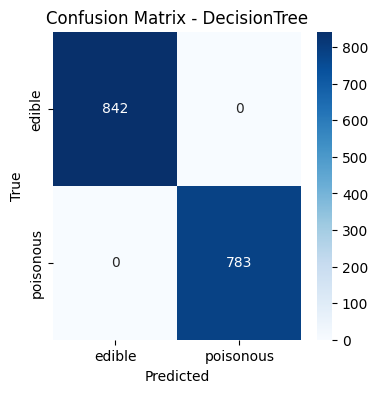

In [102]:
cm = confusion_matrix(y_test, y_pred_final)
plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["edible","poisonous"], yticklabels=["edible","poisonous"])
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

